## 库实现

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors,datasets
from sklearn.model_selection import train_test_split  

In [11]:
#使用scikit-lean自带的手写识别数据集
def load_classification_data():
    digits = datasets.load_digits()
    X_train = digits.data
    y_train = digits.target
    return train_test_split(X_train,y_train,test_size = 0.25,random_state = 0,stratify = y_train)

In [25]:
#增加噪声生成
def create_regression_data(n):
    X = 5 * np.random.rand(n,1)
    Y = np.sin(X).ravel()
    Y[::5] += 1 * (0.5 - np.random.rand(int(n / 5 )))
    return train_test_split(X,Y,test_size = 0.25 ,random_state = 0)


In [13]:
#K临近skleran
def test_KNeighborsClassifier(*data):
    X_train,X_test,y_train,y_test = data
    clf = neighbors.KNeighborsClassifier()
    clf.fit(X_train,y_train)
    print('Training Score :%f'%clf.score(X_train,y_train))
    print('Testing Score :%f'%clf.score(X_test,y_test))

## KNeighborsClassifier(n_neighbors = 5,weights = 'uniform',algorithm = 'auto',leaf_size = 30,p = 2,metric = 'minknowski',metric_params = None,n_jobs = 1, **kwargs)
### weights表示投票权券种类型，默认为都一样，distance表示权重与举例成反比，也可以自己设置
### leaf_size表示用KD树与BT树时候叶节点规模，影响树的构建和查询速度
### predict(X) 表示预测，返回X的样本标记
### score(X，y) 返回准确率
### predict_proba(x) 返回样本为每个标记的概率

In [14]:
X_train,X_test,y_train,y_test = load_classification_data()
test_KNeighborsClassifier(X_train,X_test,y_train,y_test)

Training Score :0.991091
Testing Score :0.980000


In [18]:
#考察k值与投票策略对于预测性能的影响
def test_KNeighborsClassifier_k_w(*data):
    X_train,X_test,y_train,y_test = data
    #linspace常见等差数列,endpoint表示最后一个数字是否出现在这个列表的最后一个上
    Ks = np.linspace(1,y_train.size,num = 100,endpoint=False,dtype='int')
    weights = ['uniform','distance']
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    for weight in weights:
        train_scores = []
        test_scores = []
        for K in Ks:
            clf = neighbors.KNeighborsClassifier(n_neighbors=K,weights=weight)
            clf.fit(X_train,y_train)
            test_scores.append(clf.score(X_test,y_test))
            train_scores.append(clf.score(X_train,y_train))
        ax.plot(Ks,test_scores,label='testing score:wight=%s'%weight)
        ax.plot(Ks,train_scores,label ='train score:weight=%s'%weight)
        ax.plot()
    ax.legend(loc = 'best')
    ax.set_xlabel('K')
    ax.set_ylabel('score')
    ax.set_ylim(0,1.05)
    ax.set_title('KNeighborsClassifier')
    plt.show()

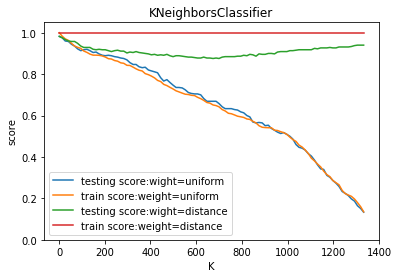

In [19]:
X_train,X_test,y_train,y_test = load_classification_data()
test_KNeighborsClassifier_k_w(X_train,X_test,y_train,y_test)

## 手动实现KNN算法

In [20]:
from math import sqrt
from collections import Counter
def KNN_Classifier(k,X_train,y_train,x):#传入的是K个邻近数据，训练集合，待测数据
    distance = []
    for x_train in X_train:
        d = sqrt(np.sum((x_train - x) ** 2))
        distance.append(d)
    nearest = np.argsort(distance)
    topK_y = [y_train[i] for i in nearest[:k]]
    votes = Counter(topK_y)
    return votes.most_common(1)[0][0]

## KNN线性回归

In [27]:
def test_KNeighborsRegressor(*data):
    X_train,X_test,y_train,y_test = data
    regr = neighbors.KNeighborsRegressor()
    regr.fit(X_train,y_train)
    print('Training Score :%f'%regr.score(X_train,y_train))
    print('Testing Score :%f'%regr.score(X_test,y_test))

In [28]:
X_train,X_test,y_train,y_test = create_regression_data(1000)
test_KNeighborsRegressor(X_train,X_test,y_train,y_test)

Training Score :0.974877
Testing Score :0.951909


In [29]:
def test_KNeighborsRegressor_k_w(*data):
    X_train,X_test,y_train,y_test = data
    #linspace常见等差数列,endpoint表示最后一个数字是否出现在这个列表的最后一个上
    Ks = np.linspace(1,y_train.size,num = 100,endpoint=False,dtype='int')
    weights = ['uniform','distance']
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    for weight in weights:
        train_scores = []
        test_scores = []
        for K in Ks:
            clf = neighbors.KNeighborsRegressor(n_neighbors=K,weights=weight)
            clf.fit(X_train,y_train)
            test_scores.append(clf.score(X_test,y_test))
            train_scores.append(clf.score(X_train,y_train))
        ax.plot(Ks,test_scores,label='testing score:wight=%s'%weight)
        ax.plot(Ks,train_scores,label ='train score:weight=%s'%weight)
        ax.plot()
    ax.legend(loc = 'best')
    ax.set_xlabel('K')
    ax.set_ylabel('score')
    ax.set_ylim(0,1.05)
    ax.set_title('KNeighborsClassifier')
    plt.show()

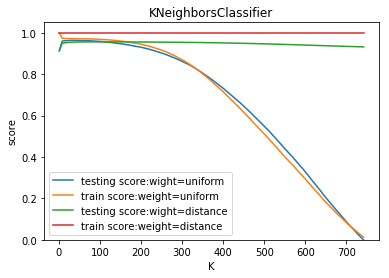

In [31]:
X_train,X_test,y_train,y_test = create_regression_data(1000)
test_KNeighborsRegressor_k_w(X_train,X_test,y_train,y_test)